# Midterm Assignment: Affordable Housing and Green Space (1)

### By Mica O'Brien

## Research question and motivation 

For our project, Estefany and I are intersted in exploring the spatial relationship between affordable housing and green space/parks. We know that access to green space is an important feature of community health. Green space decreases air pollution, provides space for physical activity, and contributes to mental wellbeing. We believe that all residents--including those living in affordable housing--deserve access to high quality amenities such as parks. However, we know that affordable housing developments tend to be located in communities with fewer resources and likely, more limited access to green space. 

As a result, we want to know: are existing affordable housing developments located near parks in the city of Los Angeles? And what is the average distance between affordable housing developments and parks in Los Angeles? How does this distance compare to that of various racial demographic groups living in market rate housing? 

We believe that policymakers and developers should consider access to green space when siting and building affordable housing. This project will allow us to explore whether this is current practice and whether residents of affordable housing have the same access as other Angelenos. 

### Data sources

We will use 3 datasets to approach our research question. The first is a dataset that includes all affordable housing developments across Los Angeles from Los Angeles GeoHub. The second is Department of Recreation and Parks' data on park boundaries in Los Angeles. We will also use census data on racial demographics by census tract. This will hopefully enable us to explore similarities and differences in access to green space by market-rate tenants of different racial backgrounds later on. 

I focus on the affordable housing and parks dataset in this Jupyter notebook, as well as neighborhood boundary data from LA county. Estefany focuses on the parks dataset and census data in her Jupyter notebook.

## Data exploration: affordable housing developments dataset 

First, I load in my libraries.

In [1]:
import pandas as pd

import geopandas as gpd

import matplotlib.pyplot as plt

import contextily as ctx

import plotly.express as px

import folium

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


I'll start by looking at and working with the affordable housing dataset, which I read in here. 

In [2]:
AH = gpd.read_file('Affordable_Housing_Development-Copy1.geojson')

I take a look at the data using the .shape and .info command. There are about 2,400 affordable housing developments in the city of LA. 

In [3]:
AH.shape

(2381, 6)

In [4]:
AH.info

<bound method DataFrame.info of       OBJECTID                                         PROJECT_NA  \
0            1                      1747 Normandie (Casa Dinivid)   
1            2                             LA Pro II Apts/berendo   
2            3                        7020 & 7024 lennox ave apts   
3            4                             LA Pro II Apts/western   
4            5                               LA Pro II Apts/menlo   
...        ...                                                ...   
2376      2377                         956 W. 9th Street - Unit 4   
2377      2378                         956 W. 9th Street - Unit 5   
2378      2379                         956 W. 9th Street - Unit 6   
2379      2380                  9247-9257 Van Nuys Boulevard Apts   
2380      2381  Vista Del Sol (Phase III of Pueblo Del Sol - A...   

                            AV_ADD  \
0           1747 N. NORMANDIE AVE.   
1                  1100 S. BERENDO   
2             7020  N. LE

I take a look at the data types using the .dtypes command. 

In [5]:
AH.dtypes

OBJECTID         int64
PROJECT_NA      object
AV_ADD          object
TOOLTIP         object
NLA_URL         object
geometry      geometry
dtype: object

I use .sample() to get a sense of what the data actually looks like. It looks like the "TOOLTIP" column includes information from the "PROJECT_NA" and "AV_ADD", so I can likely delete these. "NLA_URL" also doesn't look necessary for the purposes of my project. 

In [6]:
AH.sample(5)

OBJECTID              PROJECT_NA                AV_ADD  \
2060      2061  WESTCHESTER ASSOCIATES  8650 S. BELFORD AVE.   
1993      1994           SENATOR HOTEL       729 S. MAIN ST.   
2210      2211         midtown gardens   400 N. VERMONT AVE.   
1453      1454        5916 CARLTON WAY   5916 W. CARLTON WAY   
43          44            1032 W. 18TH      1032 W. 18TH ST.   

                                                TOOLTIP  \
2060  Project Name: WESTCHESTER ASSOCIATES\nAddress:...   
1993  Project Name: SENATOR HOTEL\nAddress: 729 S. M...   
2210  Project Name: midtown gardens\nAddress: 400 N....   
1453  Project Name: 5916 CARLTON WAY\nAddress: 5916 ...   
43    Project Name: 1032 W. 18TH\nAddress: 1032 W. 1...   

                                                NLA_URL  \
2060  navigatela/reports/affordable_housing.cfm?pk=2061   
1993  navigatela/reports/affordable_housing.cfm?pk=1994   
2210  navigatela/reports/affordable_housing.cfm?pk=2211   
1453  navigatela/reports/affordable_housing.cfm?pk=1454   
43      navigatela/reports/affordable_housing.cfm?pk=44   

                         geometry  
2060  POINT (-118.38397 33.95914)  
1993  POINT (-118.25191 34.04358)  
2210  POINT (-118.29170 34.07777)  
1453  POINT (-118.31857 34.10049)  
43    POINT (-118.27926 34.03905)

### Data cleanup: removing unnecessary columns

I list out the column names before I rename them. 

In [7]:
AH.columns.to_list()

['OBJECTID', 'PROJECT_NA', 'AV_ADD', 'TOOLTIP', 'NLA_URL', 'geometry']

I remove "TOOLTIP" and "NLA_URL" because they are repetitive and not necessary for what I am trying to do.

In [8]:
columns_revised = ['OBJECTID', 'PROJECT_NA', 'AV_ADD', 'geometry']

I check to make sure that the column snipping worked. It did!

In [9]:
columns_revised

['OBJECTID', 'PROJECT_NA', 'AV_ADD', 'geometry']

Now I can resave my dataframe with just the columns I will be using. 

In [10]:
AH = AH[columns_revised]

### Data cleanup: renaming columns

I decide to rename my columns for consistency. 

In [11]:
AH.columns = ['object_id', 'project_name', 'av_address', 'geometry']

I use .sample to make sure the renaming worked. It did! 

In [12]:
AH.sample(5)

object_id                project_name               av_address  \
722         723    1928 Park Grove Ave Apts  1928 S. PARK GROVE AVE.   
854         855                 3457 GARNET       3457 E. GARNET ST.   
1786       1787              4025 West Blvd       4025 S. WEST BLVD.   
440         441             Manhattan Manor    1257 S. MANHATTAN PL.   
1129       1130  7817 VINELAND AVENUE APTS.    7817 N. VINELAND AVE.   

                         geometry  
722   POINT (-118.27642 34.03595)  
854   POINT (-118.20250 34.02252)  
1786  POINT (-118.34512 34.01226)  
440   POINT (-118.31015 34.04816)  
1129  POINT (-118.37033 34.21241)

### Making an interactive map with the affordable housing dataset 

I now create latitude and longitude coordinates for the dataset so that I can create a map in plotly. Yoh recommended the following code to designate "lon" and "lat" columns.

In [13]:
AH['lon']=AH.geometry.x
AH['lat']=AH.geometry.y 

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


I create my plotly map of affordable housing developments across the city of LA. I am making a mental note to see if there is a way I can make the output window bigger for plotly maps at a later date. 

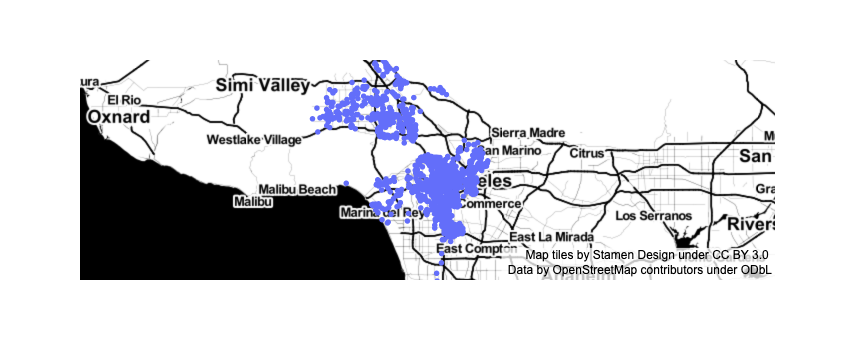

In [14]:
fig = px.scatter_mapbox(AH,
                        lat = 'lat',
                        lon = 'lon',
                        mapbox_style="stamen-toner")
fig.show()

### Making a static map with the affordable housing dataset 

I create a static map of affordable housing developments using web_mercator. As we could see with the plotly map, affordable housing developments appear to be clustered in the central/downtown part of the city. Affordable housing developments appear to be more sparse on the west side and almost nonexistent around the penninsula. I will do a deeper dive into the breakdown of affordable housing developments by neighborhood later on.

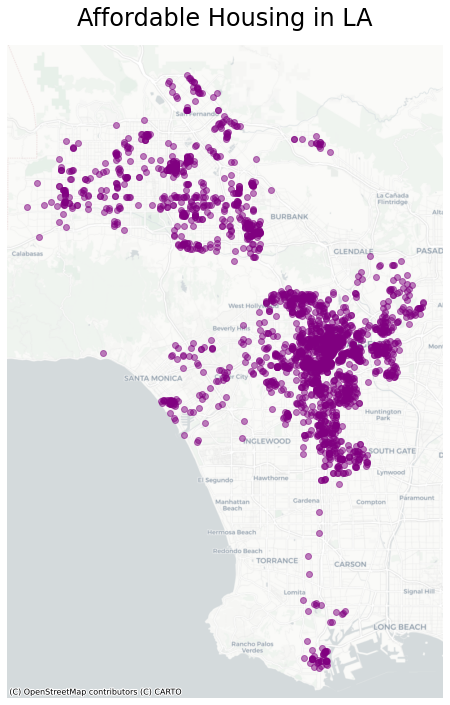

In [15]:
gdf_web_mercator = AH.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 12))

gdf_web_mercator.plot(
                        ax=ax, 
                        color="purple",
                        alpha=0.5
)

ax.axis('off')

ax.set_title('Affordable Housing in LA',fontsize=24,pad=20)

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Data exploration: Green space dataset

Now I want to spend some time exploring and working with the LA parks data before I attempt merging it with the affordable housing data. I read in the GeoJSON file. 

In [16]:
Greenspace = gpd.read_file('ParkBoundaries.geojson')

I take a look at the data using the .shape and .info command. There are 510 parks in the city of LA. 

In [17]:
Greenspace.shape

(510, 4)

In [18]:
Greenspace.info

<bound method DataFrame.info of                                address                               name  \
0                   3400 Wilshire blvd  Robert F Kennedy Inspiration Park   
1                  4702 N. Figueroa St                SYCAMORE GROVE PARK   
2                    351 N. Gaffey St.             San Pedro Welcome Park   
3                     1015 S.Wilton PL                  WILTON PLACE PARK   
4                1780 E.Santa Ana Blvd            WATTS CULTURAL CRESCENT   
..                                 ...                                ...   
505  4501 S. CENTRAL AVE, LA, CA 90011  VERNON BRANCH LIBRARY POCKET PARK   
506    4948-4956 YORK BLVD,LA,CA 90042              YORK BLVD POCKET PARK   
507                    1010 W. 25th St           HOOVER RECREATION CENTER   
508                 5340 Canoga Avenue    OLD FIRE STATION 84 POCKET PARK   
509               14353 W. Fox Streeet         FOX AND LAUREL CANYON PARK   

    objectid                               

I take a look at the data types using the .dtypes command. 

In [19]:
Greenspace.dtypes

address       object
name          object
objectid      object
geometry    geometry
dtype: object

I take a look at the data with the .sample() command. Like with the affordable housing dataset, this dataset is pretty sparse. This works for the project given that I'm mostly concerned with the geometry column at the moment. I don't have any data cleanup to do.

In [20]:
Greenspace.sample(5)

address  \
28                                1304 Pleasant Avenue   
501                      217 w. 1st STREET,LA,CA 90012   
268                                    415 Culver Blvd   
428                        3800 Stephen M. White Drive   
309  NE of Sullivan Fire Rd (per Alpha; no other ad...   

                                   name objectid  \
28                       Aliso Triangle       26   
501  1ST AND BROADWAY CIVIC CENTER PARK      504   
268                       Titmouse Park      254   
428                      Cabrillo Beach      414   
309                Sullivan Canyon Park      328   

                                              geometry  
28   MULTIPOLYGON (((-118.22260 34.05235, -118.2225...  
501  MULTIPOLYGON (((-118.24476 34.05427, -118.2440...  
268  MULTIPOLYGON (((-118.44593 33.96106, -118.4459...  
428  MULTIPOLYGON (((-118.28381 33.71351, -118.2838...  
309  MULTIPOLYGON (((-118.50794 34.06978, -118.5084...

I take a closer look at the "geometry" column. As expected, the parks are represented by multipolygons rather than points. This may complicate things later down the road when I try to merge the datasets. 

In [21]:
Greenspace['geometry']

0      MULTIPOLYGON (((-118.29796 34.06162, -118.2969...
1      MULTIPOLYGON (((-118.20110 34.10134, -118.2011...
2      MULTIPOLYGON (((-118.29286 33.74600, -118.2928...
3      MULTIPOLYGON (((-118.31504 34.05232, -118.3149...
4      MULTIPOLYGON (((-118.24221 33.93945, -118.2422...
                             ...                        
505    MULTIPOLYGON (((-118.25661 34.00268, -118.2566...
506    MULTIPOLYGON (((-118.20707 34.12131, -118.2071...
507    MULTIPOLYGON (((-118.28359 34.03293, -118.2835...
508    MULTIPOLYGON (((-118.59692 34.16705, -118.5969...
509    MULTIPOLYGON (((-118.44647 34.27148, -118.4466...
Name: geometry, Length: 510, dtype: geometry

### Making a static map with the green space dataset

I do an initial .plot to see where the parks are located across the city. 

<AxesSubplot:>

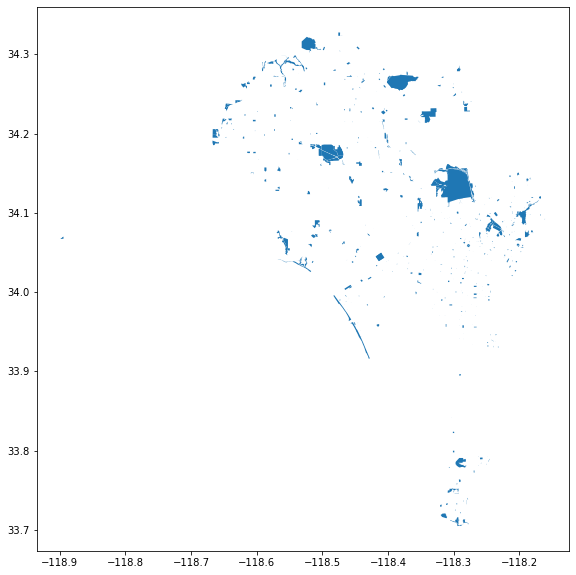

In [22]:
Greenspace.plot(figsize=(10,10))

I create a static map of green space/parks using web_mercator. Aside from Griffith Park, parks appear to be clustered around the northwest of the city. Estefany will be doing a deeper dive into the parks data, so I will hold off on making additional maps with this dataset. 

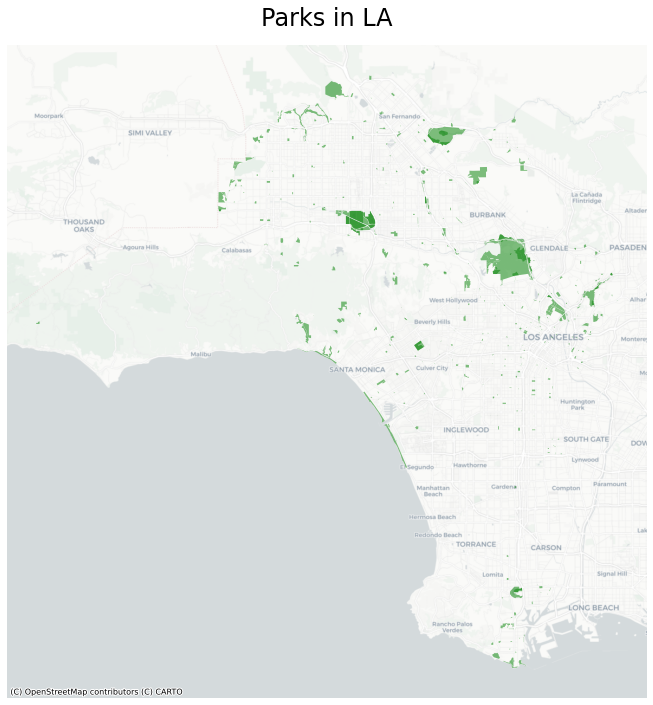

In [23]:
gdf_web_mercator = Greenspace.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 12))

gdf_web_mercator.plot(
                        ax=ax, 
                        color="green",
                        alpha=0.5
)

ax.axis('off')

ax.set_title('Parks in LA',fontsize=24,pad=20)

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)